<a href="https://colab.research.google.com/github/rehabshahzadi/ML_Learning/blob/main/toy_end2end_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Workflow

In [181]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

print("All warnings are now disabled.")

All warnings are now disabled.


#### Ensuring Reproducibility


In [182]:
import numpy as np
import random
import os

def set_seed(seed_value):
    """Set seed for reproducibility."""
    np.random.seed(seed_value)
    random.seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)


### 1. Data Generation

**Generate a dummy Dataset for classification**

In [183]:
import pandas as pd
import numpy as np

set_seed(42)
# Number of students
num_students = 100

# Generate IQ and CGPA
iq = np.random.randint(80, 120, num_students)
cgpa = np.random.uniform(1.0, 4.0, num_students)

# Simple placement logic with adjustable parameters for better balance
# You can change the weights and the threshold below to adjust the balance

iq_weight = 0.2
cgpa_weight = 1.0
threshold = 23 # Adjusted threshold for better balance

placement = (iq * iq_weight + cgpa * cgpa_weight + np.random.randn(num_students) > threshold).astype(int)


# Create DataFrame
data = {'iq': iq, 'cgpa': cgpa, 'placement': placement}
df = pd.DataFrame(data)

# Display the first few rows
display(df.head(20))

# Display the value counts of the placement column to check for balance
display(df['placement'].value_counts())

,iq,cgpa,placement
0,118,1.190675,1
1,108,1.932947,1
2,94,1.975550,0
3,87,3.188819,0
4,100,2.912672,1
5,118,3.661638,1
6,98,2.416645,0
7,102,1.358783,0
8,90,3.139734,0
9,90,3.282355,0


,count
placement,
0,55
1,45


**Data Distribution**

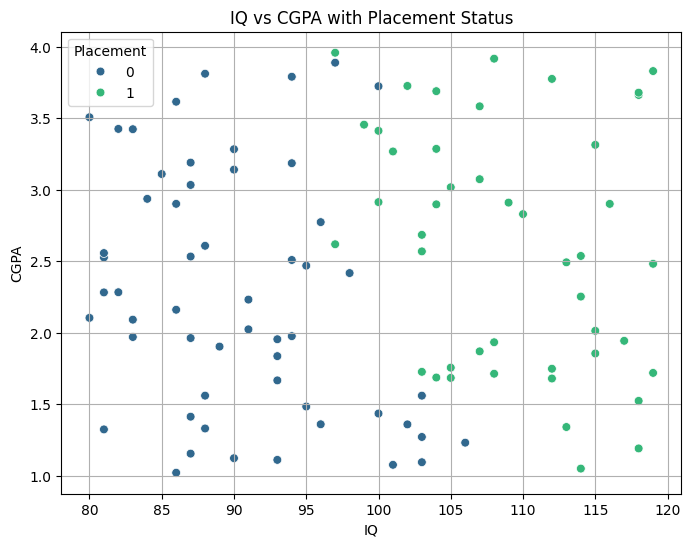

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='iq', y='cgpa', hue='placement', palette='viridis', s=40)

# Add title and labels
plt.title('IQ vs CGPA with Placement Status')
plt.xlabel('IQ')
plt.ylabel('CGPA')

# Add a legend
plt.legend(title='Placement')

# Show the plot
plt.grid(True)
plt.show()

### 2. Data Splitting
Next, we split the dataset into training and testing sets to prepare it for model training and evaluation. A test size of 0.3 was used, and the splitting was stratified based on the 'placement' column to maintain the class distribution in both sets.

In [185]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df[['iq', 'cgpa']]
y = df['placement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (70, 2)
Shape of X_test: (30, 2)
Shape of y_train: (70,)
Shape of y_test: (30,)


### 3. Data Scaling and Model Training

We then scaled the features using `StandardScaler`. This is an important preprocessing step for many machine learning models, especially linear ones, as it helps to normalize the range of the features. After scaling, we trained a Logistic Regression model on the scaled training data. Logistic Regression is a common linear model used for binary classification.

In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model (a type of linear classifier)
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)


LogisticRegression()


### 4. Model Evaluation

Finally, we evaluated the trained model on the scaled testing data using accuracy and a classification report. The accuracy gives an overall measure of correctness, while the classification report provides more detailed metrics like precision, recall, and F1-score for each class.

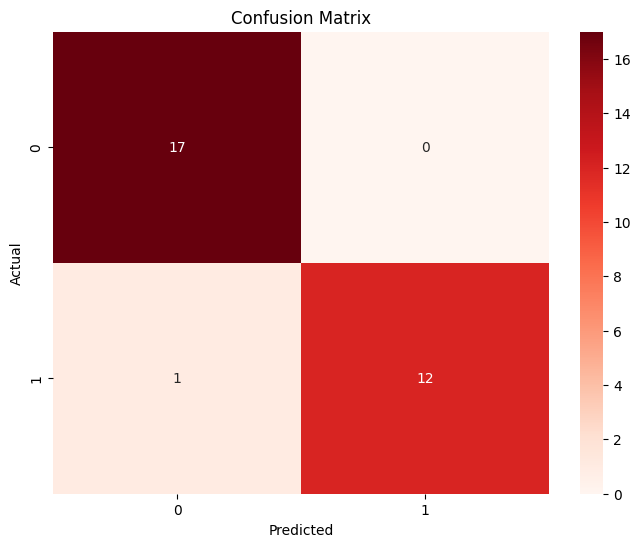

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [187]:

# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
report = classification_report(y_test, y_pred)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(report)

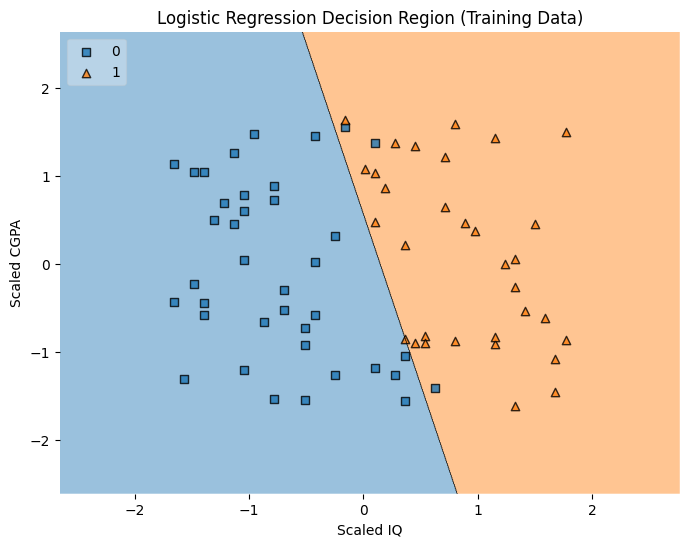

In [188]:
# Install mlxtend if you haven't already
!pip install mlxtend --quiet

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Convert y_train to a NumPy array of integers if it's not already
y_train_np = y_train.values.astype(np.integer)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train_scaled, y_train_np, clf=model, legend=2)

# Add title and labels
plt.title('Logistic Regression Decision Region (Training Data)')
plt.xlabel('Scaled IQ')
plt.ylabel('Scaled CGPA')
plt.show()


### 5. Save the Model


In [189]:
import joblib
import os

# Define the directory to save the model and scaler
model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

# Define the file paths for the model and scaler
model_filename = 'logistic_regression_model.joblib'
scaler_filename = 'scaler.joblib' # Using a .joblib extension for the scaler as well
model_path = os.path.join(model_dir, model_filename)
scaler_path = os.path.join(model_dir, scaler_filename)

# Save the trained model and scaler
joblib.dump(model, model_path)
joblib.dump(scaler, scaler_path) # Save the scaler object

print(f"Model saved successfully to: {model_path}")
print(f"Scaler saved successfully to: {scaler_path}")

Model saved successfully to: saved_models/logistic_regression_model.joblib
Scaler saved successfully to: saved_models/scaler.joblib


### 5. Load the Model


In [190]:
import joblib
import os
import numpy as np
# Define the file paths for the model and scaler
model_filename = 'logistic_regression_model.joblib'
scaler_filename = 'scaler.joblib' # Using a .joblib extension for the scaler as well
model_path = os.path.join(model_dir, model_filename)
scaler_path = os.path.join(model_dir, scaler_filename)

# Load the model and scaler from the file
try:
    loaded_model = joblib.load(model_path)
    # Attempt to load the scaler. If not found, inform the user.
    try:
        loaded_scaler = joblib.load(scaler_path)
        print(f"Model loaded successfully from: {model_path}")
        print(f"Scaler loaded successfully from: {scaler_path}")

        # Get input from the user
        print("\nPlease enter the following details for prediction:")
        try:
            user_iq = float(input("Enter IQ: "))
            user_cgpa = float(input("Enter CGPA: "))

            # Prepare the input for prediction (needs to be in the same format as training data - 2D array)
            user_input = np.array([[user_iq, user_cgpa]])

            # Scale the user input using the loaded scaler
            user_input_scaled = loaded_scaler.transform(user_input)

            # Make prediction using the loaded model
            prediction = loaded_model.predict(user_input_scaled)
            prediction_proba = loaded_model.predict_proba(user_input_scaled)

            print("\nPrediction:")
            if prediction[0] == 1:
                print(f"Based on the input, the student is likely to be PLACED.")
            else:
                print(f"Based on the input, the student is likely NOT to be placed.")

        except ValueError:
            print("Invalid input. Please enter numerical values for IQ and CGPA.")

    except FileNotFoundError:
         print(f"Error: Scaler file not found at {scaler_path}. Please make sure you have saved the scaler first.")


except FileNotFoundError:
    print(f"Error: Model file not found at {model_path}. Please make sure you have saved the model first.")
except Exception as e:
    print(f"An error occurred while loading the model, scaler, or making predictions: {e}")

Model loaded successfully from: saved_models/logistic_regression_model.joblib
Scaler loaded successfully from: saved_models/scaler.joblib

Please enter the following details for prediction:
Enter IQ: 110
Enter CGPA: 3

Prediction:
Based on the input, the student is likely to be PLACED.
